This project aims to predict a car's market price using its attributes

In [21]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data', header=None)
cars.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [22]:
cars.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',  'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [23]:
# find columns with ? as values
cars.columns[cars.isin(['?']).any()]

Index(['normalized_losses', 'num_doors', 'bore', 'stroke', 'horsepower',
       'peak_rpm', 'price'],
      dtype='object')

In [24]:
# replace all of the ? values with the numpy.nan missing value
cars = cars.replace('?', np.nan)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [28]:
# convert approperiate columns to numeric types
cars['normalized_losses'] = cars['normalized_losses'].astype(float)
# cars['num_doors'].astype(string)
# cars['bore'].astype(string)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float)
cars['peak_rpm'] = cars['peak_rpm'].astype(float)
cars['wheel_base'] = cars['wheel_base'].astype(float)
cars['engine_size'] = cars['engine_size'].astype(float)
cars['price'] = cars['price'].astype(float)

investigate missing values

In [29]:
cars['normalized_losses'].isnull().value_counts()

False    164
True      41
Name: normalized_losses, dtype: int64

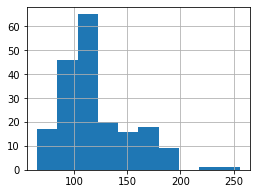

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
notnull = cars[cars['normalized_losses'].notnull()]['normalized_losses']
plt.figure(figsize=(4,3))
cars['normalized_losses'].hist()

In [44]:
# given the normal distribution with over 40 missing values, will replace missing values with the mean.
cars['normalized_losses'].mean()
cars['normalized_losses'] = cars['normalized_losses'].fillna(cars['normalized_losses'].mean())
cars['normalized_losses'].isnull().value_counts()

False    193
Name: normalized_losses, dtype: int64

In [33]:
print(cars['stroke'].isnull().value_counts())
print(cars['horsepower'].isnull().value_counts())
print(cars['peak_rpm'].isnull().value_counts())
print(cars['wheel_base'].isnull().value_counts())
print(cars['engine_size'].isnull().value_counts())
print(cars['price'].isnull().value_counts())

False    201
True       4
Name: stroke, dtype: int64
False    203
True       2
Name: horsepower, dtype: int64
False    203
True       2
Name: peak_rpm, dtype: int64
False    205
Name: wheel_base, dtype: int64
False    205
Name: engine_size, dtype: int64
False    201
True       4
Name: price, dtype: int64


In [45]:
# given the small number of missing values, will drop any row with missing values
cars = cars.dropna()

In [46]:
# normalize the numeric columns to limit values from 0 to 1
def norm(df, col_ls):
    for col in col_ls:
        df[col] = df[col]/df[col].max()
    return df[col_ls]
col_ls = ['normalized_losses', 'stroke', 'horsepower', 'peak_rpm', 'wheel_base','engine_size']
cars_copy = cars.copy()
cars_copy[col_ls] = norm(cars_copy, col_ls)
cars_copy[col_ls].head(3)

,normalized_losses,stroke,horsepower,peak_rpm,wheel_base,engine_size
0,0.476562,0.642686,0.423664,0.757576,0.732837,0.398773
1,0.476562,0.642686,0.423664,0.757576,0.732837,0.398773
2,0.476562,0.832134,0.587786,0.757576,0.781638,0.466258


#### Perform modeling

In [47]:
# univariate k-nearest neighbors models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col, target_col, df):
    # split data with 75:25 for train and test
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse

rmse_losses = knn_train_test(['normalized_losses'], ['price'], cars_copy)
print('rmse_losses', rmse_losses)

rmse_stroke = knn_train_test(['stroke'], ['price'], cars_copy)
print('rmse_stroke', rmse_stroke)

rmse_hp = knn_train_test(['horsepower'], ['price'], cars_copy)
print('rmse_hp', rmse_hp)

rmse_rpm = knn_train_test(['peak_rpm'], ['price'], cars_copy)
print('rmse_rpm', rmse_rpm)

rmse_base = knn_train_test(['wheel_base'], ['price'], cars_copy)
print('wheel_base', rmse_base)

rmse_engine = knn_train_test(['engine_size'], ['price'], cars_copy)
print('engine_size', rmse_engine)

rmse_losses 7740.845284645361
rmse_stroke 7974.5191580714745
rmse_hp 3598.795543749921
rmse_rpm 7261.908671012219
wheel_base 5651.528404506057
engine_size 3482.102463296845


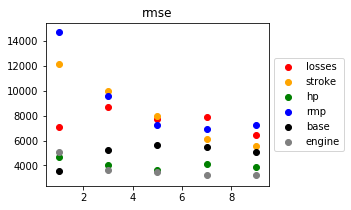

In [69]:
# including k for the function
def knn_train_test(train_col, target_col, df, k):
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse

rmses_losses = []
rmses_stroke = []
rmses_hp = []
rmses_rpm = []
rmses_base = []
rmses_engine = []

for k in [1, 3, 5, 7, 9]:
    rmse_losses = knn_train_test(['normalized_losses'], ['price'], cars_copy, k)
    rmses_losses.append(rmse_losses)
    rmse_stroke = knn_train_test(['stroke'], ['price'], cars_copy, k)
    rmses_stroke.append(rmse_stroke)
    rmse_hp = knn_train_test(['horsepower'], ['price'], cars_copy, k)
    rmses_hp.append(rmse_hp)
    rmse_rpm = knn_train_test(['peak_rpm'], ['price'], cars_copy, k)
    rmses_rpm.append(rmse_rpm)
    rmse_base = knn_train_test(['wheel_base'], ['price'], cars_copy, k)
    rmses_base.append(rmse_base)
    rmse_engine = knn_train_test(['engine_size'], ['price'], cars_copy, k)
    rmses_engine.append(rmse_engine)
    
plt.figure(figsize=(4,3))    
plt.scatter([1, 3, 5, 7, 9], rmses_losses, color ='red', label='losses')
plt.scatter([1, 3, 5, 7, 9], rmses_stroke, color='orange', label='stroke')
plt.scatter([1, 3, 5, 7, 9], rmses_hp, color = 'green', label='hp')
plt.scatter([1, 3, 5, 7, 9], rmses_rpm, color = 'blue', label='rmp')
plt.scatter([1, 3, 5, 7, 9], rmses_base, color = 'black', label='base')
plt.scatter([1, 3, 5, 7, 9], rmses_engine, color = 'gray', label='engine')
plt.title('rmse')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [49]:
# using multiple columns for presiction

rmse_two = knn_train_test(['horsepower', 'engine_size'], ['price'], cars_copy, 1)
print('rmse_two', rmse_two)
rmse_three = knn_train_test(['horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy,1)
print('rmse_three', rmse_three)
rmse_four = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy, 1)
print('rmse_four', rmse_four)
rmse_five = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke'], ['price'], cars_copy, 1)
print('rmse_five', rmse_five)

rmse_two 3434.1212552730817
rmse_three 3241.56723559101
rmse_four 2989.585136053878
rmse_five 3232.4645143813555


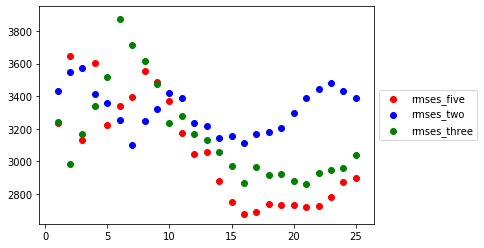

In [70]:
# vary the hyperparameter value
rmses_five = []
rmses_two = []
rmses_three = []

for k in range(1,26):
    rmse_five = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke'], ['price'], cars_copy, k)
    rmses_five.append(rmse_five)
    rmse_two = knn_train_test(['horsepower', 'engine_size'], ['price'], cars_copy, k)
    rmses_two.append(rmse_two)
    rmse_three = knn_train_test(['horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy, k)
    rmses_three.append(rmse_three)
plt.scatter(list(range(1,26)), rmses_five, color ='red', label='rmses_five')
plt.scatter(list(range(1,26)), rmses_two, color='blue', label='rmses_two')
plt.scatter(list(range(1,26)), rmses_three, color = 'green', label='rmses_three')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

five nearest neighbors and 15 fold split of data resulted in the smallest rmse

#### prediction using k-fold cross validation instead of test/train validation

In [54]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
cols = ['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke']
rmses_ls = []
std_rmse_ls = []
for fold in num_folds:
    kf = KFold(fold, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, cars_copy[cols], cars_copy["price"], scoring = "neg_mean_squared_error", cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    rmses_ls.append(avg_rmse)
    std_rmse = np.std(rmses)
    std_rmse_ls.append(std_rmse)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "  std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  3719.3606591843964   std RMSE:  531.8165243288654
5 folds:  avg RMSE:  3376.5869329241295   std RMSE:  434.3535288294119
7 folds:  avg RMSE:  3110.5389805573645   std RMSE:  970.9069939503901
9 folds:  avg RMSE:  2975.2604374912657   std RMSE:  923.5692267257427
10 folds:  avg RMSE:  3024.284604976535   std RMSE:  885.7841732177084
11 folds:  avg RMSE:  2916.6288049647924   std RMSE:  1114.5983116971945
13 folds:  avg RMSE:  2917.1391490826963   std RMSE:  963.5565725063663
15 folds:  avg RMSE:  2870.971075230726   std RMSE:  1241.5475521770138
17 folds:  avg RMSE:  2898.2193402435814   std RMSE:  1209.7861778673591
19 folds:  avg RMSE:  2770.7623371385466   std RMSE:  1237.5186025236737
21 folds:  avg RMSE:  2798.4068839709016   std RMSE:  1391.8620637803272
23 folds:  avg RMSE:  2787.7093567393404   std RMSE:  1280.5133329357384


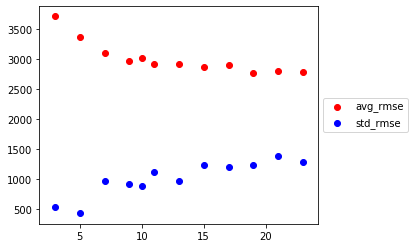

In [71]:
plt.figure(figsize = (5,4))
plt.scatter(num_folds, rmses_ls, color = 'red', label='avg_rmse')
plt.scatter(num_folds, std_rmse_ls, color = 'blue', label='std_rmse')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))